In [1]:
# !pip install yfinance

In [1]:
from matplotlib import pylab as plt
%matplotlib inline
# import scipy.stats
import yfinance as yf
import datetime
import pandas as pd

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
def get_oil_price_data(start_date, end_date):
    # Ticker symbol for Crude Oil (Brent) on Yahoo Finance
    ticker_symbol = "BZ=F"

    # Fetch historical data
    data = yf.download(ticker_symbol, start=start_date, end=end_date)

    return data

In [3]:
start_date = "2023-04-01"
end_date = "2024-04-30"
output_csv = "BrentOilPrices.csv"

# Fetch oil price data
oil_data = get_oil_price_data(start_date, end_date)

# Print the fetched data (optional)
print(oil_data)

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2023-04-03  83.290001  86.239998  83.290001  84.930000  84.930000   37587
2023-04-04  84.779999  86.050003  83.870003  84.940002  84.940002   32987
2023-04-05  85.099998  85.550003  84.010002  84.989998  84.989998   28362
2023-04-06  84.830002  85.440002  84.050003  85.120003  85.120003       0
2023-04-10  84.949997  85.639999  84.080002  84.180000  84.180000   14242
...               ...        ...        ...        ...        ...     ...
2024-04-23  87.230003  88.489998  86.040001  88.419998  88.419998   35381
2024-04-24  88.459999  88.800003  87.650002  88.019997  88.019997   26662
2024-04-25  88.110001  89.260002  87.290001  89.010002  89.010002   24588
2024-04-26  89.209999  89.830002  88.800003  89.500000  89.500000   15475
2024-04-29  89.250000  89.300003  88.099998  88.400002  88.400002   15093

[271 rows x 6 columns]


In [7]:
len(oil_data)

271

In [4]:
oil_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-03,83.290001,86.239998,83.290001,84.930000,84.930000,37587
2023-04-04,84.779999,86.050003,83.870003,84.940002,84.940002,32987
2023-04-05,85.099998,85.550003,84.010002,84.989998,84.989998,28362
2023-04-06,84.830002,85.440002,84.050003,85.120003,85.120003,0
2023-04-10,84.949997,85.639999,84.080002,84.180000,84.180000,14242


In [5]:
oil_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,271.0,82.659078,5.545183,71.889999,78.065002,82.580002,86.369999,96.620003
High,271.0,83.735978,5.475327,73.730003,79.345001,83.480003,87.349998,97.629997
Low,271.0,81.565129,5.631281,68.199997,77.010002,81.709999,85.560001,94.959999
Close,271.0,82.667343,5.567707,71.839996,78.139999,82.739998,86.355000,96.550003
Adj Close,271.0,82.667343,5.567707,71.839996,78.139999,82.739998,86.355000,96.550003
Volume,271.0,28231.667897,9306.532169,0.000000,22566.000000,28386.000000,34084.000000,59320.000000


In [6]:
def visualize_and_save_data(data, output_csv):
    # Plotting the closing price
    plt.figure(figsize=(10, 6))
    plt.plot(data['Close'], label='Closing Price', color='blue')
    plt.title('Crude Oil Prices (Brent)')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('outputs0/Crude Oil Prices (Brent) from 2023-04 to 2024-04.png')
    plt.show()

    # Save data to CSV file
    # data.to_csv(output_csv)
    print(f"Data saved to {output_csv}")

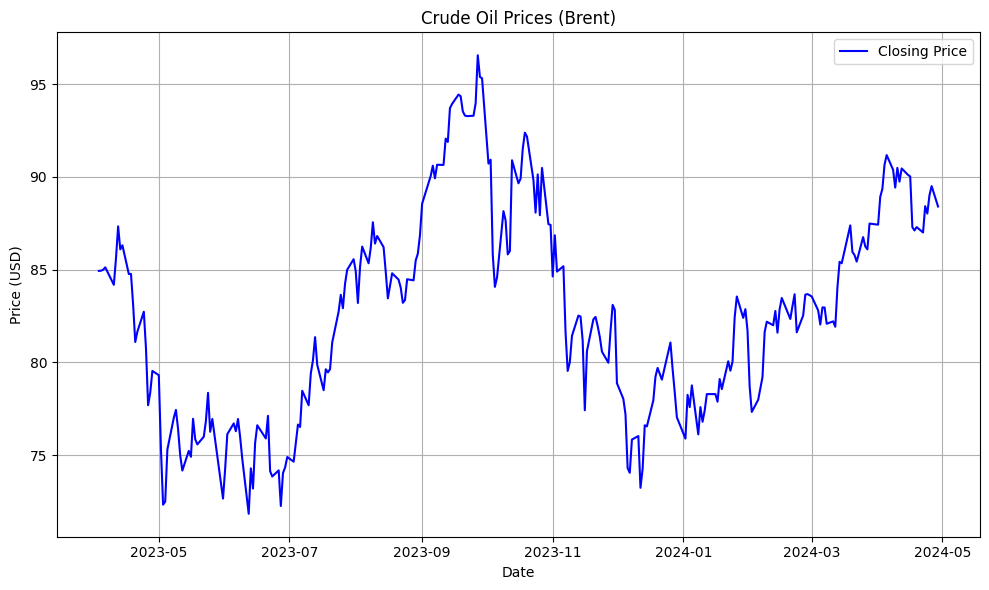

Data saved to BrentOilPrices.csv


In [6]:
# Visualize and save data
visualize_and_save_data(oil_data, output_csv)

In [8]:
# Fetch oil price data
oil_data = get_oil_price_data(start_date, end_date)
oil_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-03,83.290001,86.239998,83.290001,84.930000,84.930000,37587
2023-04-04,84.779999,86.050003,83.870003,84.940002,84.940002,32987
2023-04-05,85.099998,85.550003,84.010002,84.989998,84.989998,28362
2023-04-06,84.830002,85.440002,84.050003,85.120003,85.120003,0
2023-04-10,84.949997,85.639999,84.080002,84.180000,84.180000,14242
...,...,...,...,...,...,...
2024-04-23,87.230003,88.489998,86.040001,88.419998,88.419998,35381
2024-04-24,88.459999,88.800003,87.650002,88.019997,88.019997,26662
2024-04-25,88.110001,89.260002,87.290001,89.010002,89.010002,24588


In [9]:
true_rates = oil_data['Close']
print(len(true_rates))
true_rates

271


Date
2023-04-03    84.930000
2023-04-04    84.940002
2023-04-05    84.989998
2023-04-06    85.120003
2023-04-10    84.180000
                ...    
2024-04-23    88.419998
2024-04-24    88.019997
2024-04-25    89.010002
2024-04-26    89.500000
2024-04-29    88.400002
Name: Close, Length: 271, dtype: float64

In [10]:

# Extract only the 'Close' column
data = oil_data[['Close']].reset_index()
data

,Date,Close
0,2023-04-03,84.930000
1,2023-04-04,84.940002
2,2023-04-05,84.989998
3,2023-04-06,85.120003
4,2023-04-10,84.180000
...,...,...
266,2024-04-23,88.419998
267,2024-04-24,88.019997
268,2024-04-25,89.010002
269,2024-04-26,89.500000


In [11]:
# Rename columns to 'date' and 'price'
data.columns = ['Date', 'Price']
data

,Date,Price
0,2023-04-03,84.930000
1,2023-04-04,84.940002
2,2023-04-05,84.989998
3,2023-04-06,85.120003
4,2023-04-10,84.180000
...,...,...
266,2024-04-23,88.419998
267,2024-04-24,88.019997
268,2024-04-25,89.010002
269,2024-04-26,89.500000


In [17]:
output_csv = "BrentOilPrices.csv"

# Save data to CSV file
data.to_csv(output_csv, index=False)
print(f"Data saved to {output_csv}")



Data saved to BrentOilPrices.csv


In [11]:
# Ad-fuller test to check the stationarity of the signal
brent_residue_price = adfuller(data['Price'])
ans_brent = 'stationary' if brent_residue_price[1] < 0.05 else 'not stationary'
print(brent_residue_price)
print(ans_brent)

(-1.7436793694108597, 0.40875957889904124, 3, 267, {'1%': -3.4550813975770827, '5%': -2.8724265892710914, '10%': -2.5725712007462582}, 917.3652471656366)
not stationary


In [13]:
brent_seasonal = data['Price']
brent_seasonal

0      84.930000
1      84.940002
2      84.989998
3      85.120003
4      84.180000
         ...    
266    88.419998
267    88.019997
268    89.010002
269    89.500000
270    88.400002
Name: Price, Length: 271, dtype: float64

In [14]:
# split the available data as historical and future for computing forecast error 
# brent_seasonal = data
# brent_seasonal.index = brent_seasonal.[].to_timestamp()
brent_y_hist = brent_seasonal[:200] 
# brent_y_future = brent_seasonal[0.8:, 'price']
brent_y_future = brent_seasonal[200:]
brent_y_hist, brent_y_future

(0      84.930000
 1      84.940002
 2      84.989998
 3      85.120003
 4      84.180000
          ...    
 195    76.800003
 196    77.410004
 197    78.290001
 198    78.290001
 199    77.879997
 Name: Price, Length: 200, dtype: float64,
 200    79.099998
 201    78.559998
 202    80.059998
 203    79.550003
 204    80.040001
          ...    
 266    88.419998
 267    88.019997
 268    89.010002
 269    89.500000
 270    88.400002
 Name: Price, Length: 71, dtype: float64)

In [15]:
# Seasonal decomposition of the time series

period =  30 #number of business days multiplied by time period
b_sd_result = seasonal_decompose(brent_y_hist, period = period, model = 'multiplicative', extrapolate_trend = True)
print(b_sd_result.trend.size)
print(b_sd_result.seasonal.size)

200
200


Text(0.5, 1.0, 'Seasonal Decomposition plot of Brent crude oil price data')

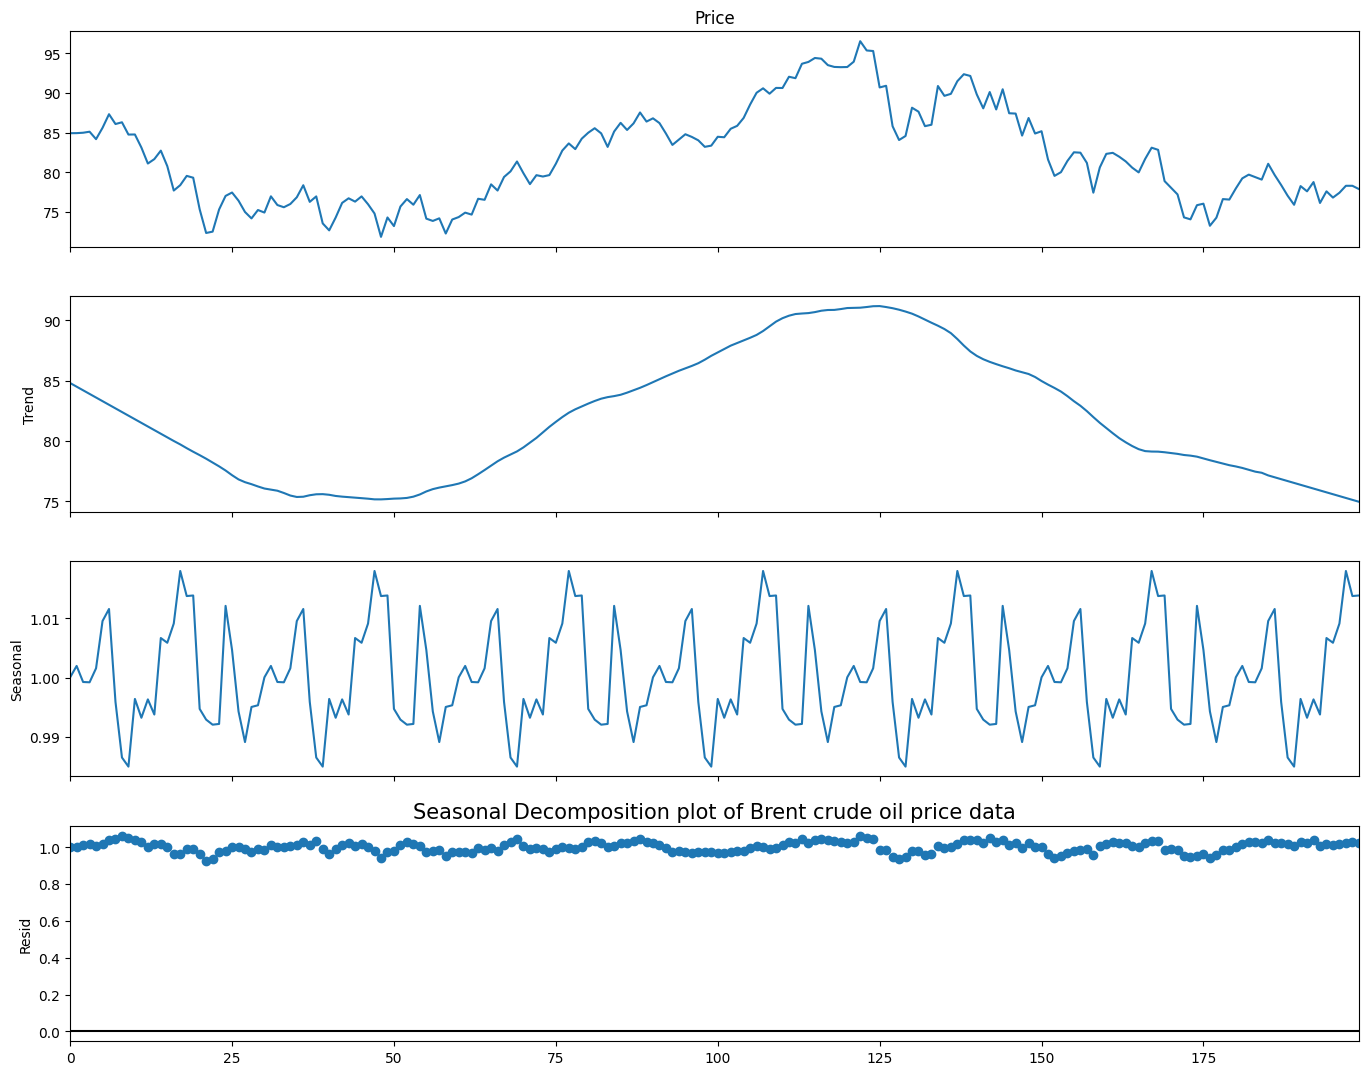

In [16]:
# Plotting the seasonal decomposition

fig_b_hist_decomp = b_sd_result.plot()
fig_b_hist_decomp.set_size_inches(15, 12) 
plt.title('Seasonal Decomposition plot of Brent crude oil price data', fontsize=15)